## **Data Analysis Python Project - Blinkit Analysis**

## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

## **Import Raw Data**

In [2]:
df=pd.read_csv('C:/Users/DELL/Downloads/BlinkIT Grocery Data.csv')

## **Sample**

In [3]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


## **Size Of Data** 

In [4]:
print('Size Of Data: ',df.shape)

Size Of Data:  (8523, 12)


## **Field Info**

In [5]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

## **Data Type**

In [6]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

## **Data Cleaning**

In [7]:
print("Item Fat Content :",df['Item Fat Content'].unique())

Item Fat Content : ['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [8]:
df['Item Fat Content'] = df['Item Fat Content'].replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"})

In [9]:
print("Unique Item Fat Content :",df['Item Fat Content'].unique())

Unique Item Fat Content : ['Regular' 'Low Fat']


## **Business Requirements**

## **KPI'S**

In [10]:
# total sales 
print(f"Total Sales: ${df['Sales'].sum():.0f}")

Total Sales: $1201681


In [11]:
# Avg Sale 
print(f"AVerage Sales: ${df['Sales'].mean():.0f}")

AVerage Sales: $141


In [12]:
# Number of item sold 
print(f"No of Items Sold: {df['Sales'].count():.0f}")

No of Items Sold: 8523


In [13]:
# Avg Rating 
print(f"Avg Rating: {df['Rating'].mean():.0f}")

Avg Rating: 4


## **Charts Requirements**

## **Total Sales by Fat Content** 

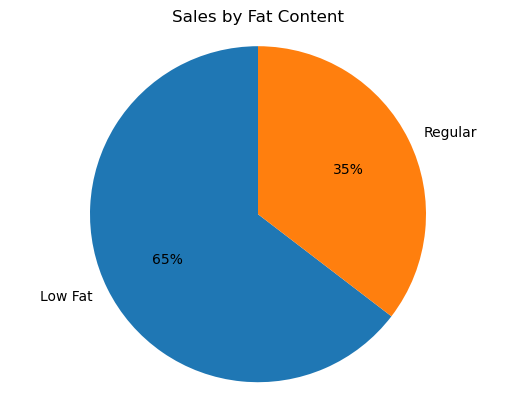

In [14]:
sales_by_fat=df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat,labels=sales_by_fat.index,autopct='%.0f%%',startangle=90)
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

## **Total Sales by Item Type**

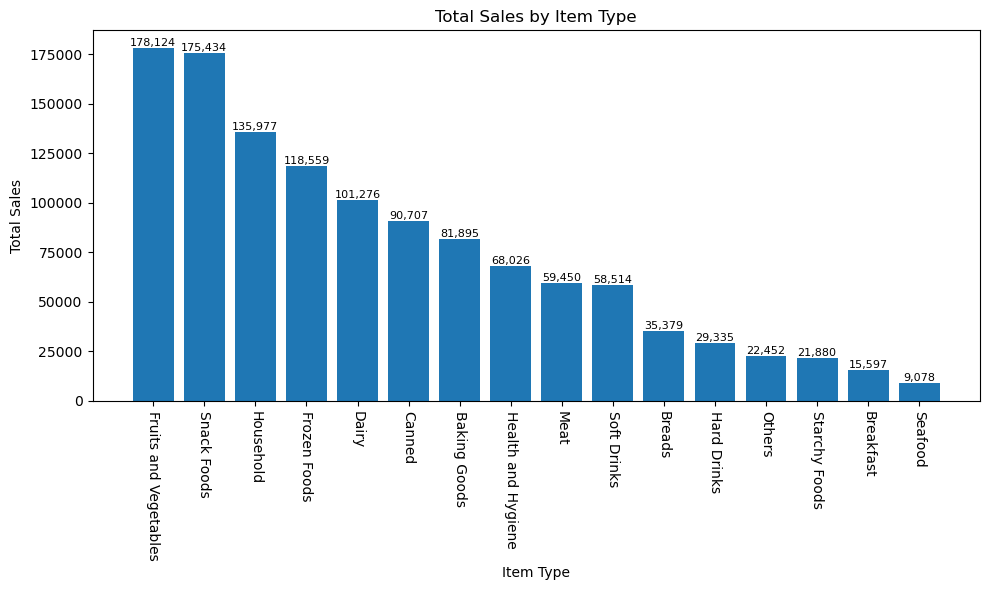

In [15]:
sales_by_item = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_item.index, sales_by_item.values)
# Adding value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        height,                             # Y position
        f'{height:,.0f}',                   # Text format (no decimal, comma separator)
        ha='center', va='bottom', fontsize=8
    )

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')
plt.tight_layout()
plt.show()

## **Fat Content by Outlet For Total Sales**

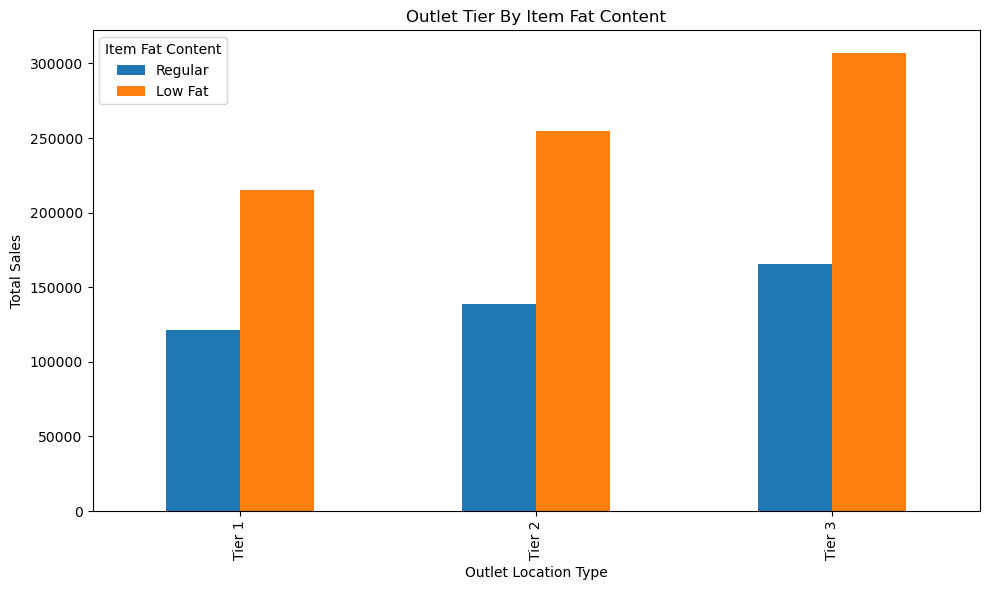

In [16]:
grouped = df.groupby(["Outlet Location Type", "Item Fat Content"])["Sales"].sum()

grouped = grouped.unstack()  # Now columns are: 'Low Fat', 'Regular'

# make sure only 'Regular' and 'Low Fat' columns are included
grouped = grouped[['Regular', 'Low Fat']]

# Plot the bar chart
ax = grouped.plot(kind='bar', figsize=(10, 6),title='Outlet Tier By Item Fat Content')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()


## **Total Sales By Outlet Establishment**

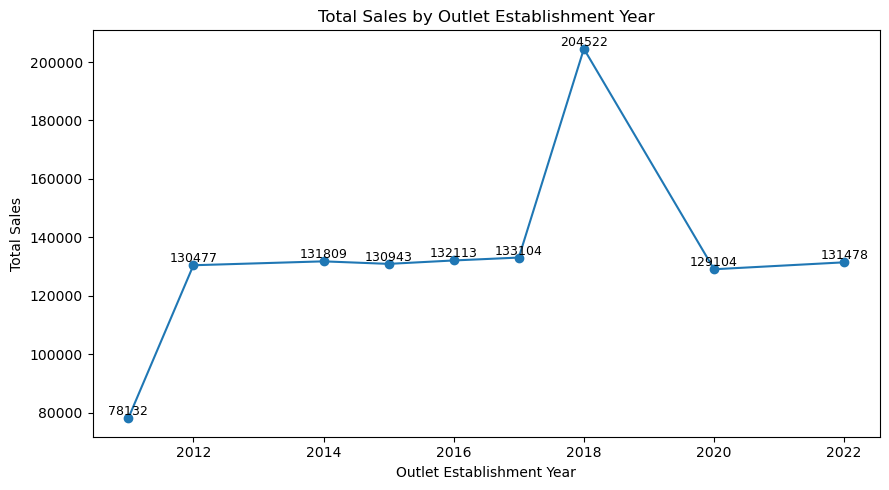

In [17]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment Year')

# Adding text labels to each data point
for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## **Sales By Outlet Size**

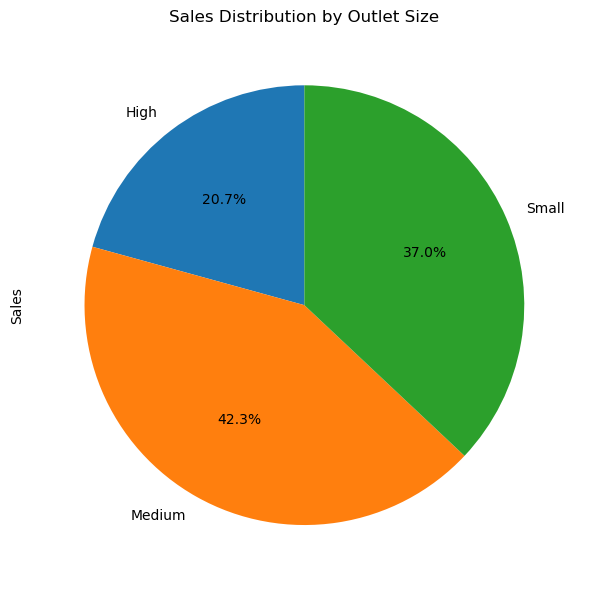

In [18]:
sales_by_outlet_size = df.groupby('Outlet Size')['Sales'].sum()

# Plotting pie chart
plt.figure(figsize=(6,6))
sales_by_outlet_size.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Outlet Size')
plt.tight_layout()
plt.show()

## **Sales By Outlet Location**

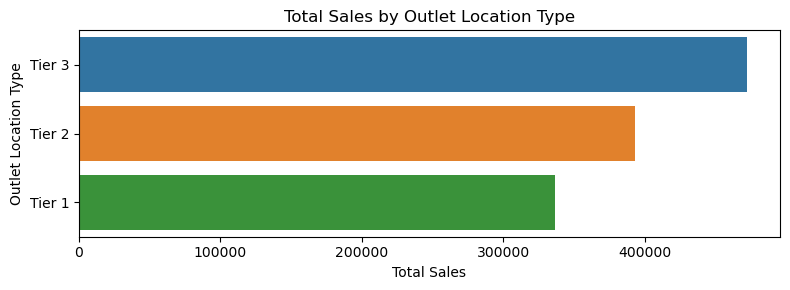

In [19]:
sales_by_location=df.groupby('Outlet Location Type')['Sales'].sum().reset_index().sort_values('Sales',ascending=False)
plt.figure(figsize=(8,3))
ax=sns.barplot(x='Sales',y='Outlet Location Type',data=sales_by_location)
plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()